In [44]:
import pandas as pd
import glob
import os
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dropbox_dir = "C:/Users/cocoy/Dropbox (Palmer Lab)"
#work_dir = dropbox_dir + "/Palmer Lab/Beverly Peng/U01_Olivier_Cocaine"
meta_dir = dropbox_dir + "/Suzanne_Mitchell_U01/Data-locomotor"


In [9]:
#Creating one dataframe with all locomotor files
#Must manually unzip all folders
#Must combine locomotor 5 files from T1&T2 and T3&T4 into one file named comprehensive_output_files
cohorts_dir = ['Shipment1_locomotor','Shipment2_locomotor','Shipment3_locomotor','Shipment4_locomotor',
              'Shipment5_locomotor','Shipment6_locomotor','ShipR_locomotor']
zip_folder = ['U01_Shipment1_Locomotor/comprehensive-output-files/','U01_Shipment2_Locomotor/S2-comprehensive-output-files/',
              'U01-Shipment3_Locomotor/S3-comprehensive-out-files/','comprehensive_output_files/',
              'comprehensive-output-files/','Ship6-comprehensive-output-files/S6-comprehensive-out-files/',
              'R-comprehensive-output-files/R-comprehensive-output-files/']
dir_dict = {cohorts_dir[i]: zip_folder[i] for i in range(len(cohorts_dir))}
count = 0
df_excel = pd.DataFrame()
df_csv = pd.DataFrame()
for cohort_dir,zip_folder in dir_dict.items():
        #for cohort in cohort_list:
        raw_dir = meta_dir + "/" + cohort_dir + "/" + zip_folder
        os.chdir(raw_dir)
        for file in os.listdir(raw_dir):
            if file.endswith('.xlsx'):
                df_excel = df_excel.append(pd.read_excel(file), ignore_index=True)
            elif file.endswith('.csv'):
                count += 1
                df_csv = df_csv.append(pd.read_csv(file, skiprows = 58), ignore_index=True)

                
df_csv
print(count)

322


In [4]:
def format_df_csv():
    #make column headers uniform
    df_csv.columns = df_csv.columns.str.replace(':','')
    df_csv.columns = df_csv.columns.str.replace(' ','_')
    df_csv.columns = df_csv.columns.str.lower()
    
    df_csv.rename(columns={'subject_id':'rfid','duration_(s)':'duration','total_distance_(cm)':'total_distance',
                           'total_distance_x-axis_(cm)':'total_distance_x','total_distance_y-axis_(cm)':
                           'total_distance_y','rest_time_(s)':'rest_time','movement_time_(s)':'movement_time',
                           'ambulatory_time_(s)':'ambulatory_time','stereotypy_time_(s)':'stereotypy_time',
                           'vertical_activity_time_(s)':'vertical_activity_time','ambulatory_episode_average_velocity_(cm/s)':
                           'ambulatory_episode_average_velocity','ambulatory_episode_peak_average_velocity_(cm/s)':
                           'ambulatory_episode_peak_average_velocity','ambulatory_episode_median_velocity_(cm/s)':
                           'ambulatory_episode_median_velocity','left-front_time_legacy_(s)':'left-front_time_legacy',
                           'right-front_time_legacy_(s)':'right_front_time_legacy','counter-clockwise_revolutions':
                           'counter_clockwise_revolutions','left-rear_time_legacy_(s)':'left_rear_time_legacy',
                           'right-rear_time_legacy_(s)':'right_rear_time_legacy','margin_time_legacy_(s)':
                           'margin_time_legacy','center_time_legacy_(s)':'center_time_legacy','margin_distance_legacy_(cm)':
                           'margin_distance_legacy','center_distance_legacy_(cm)':'center_distance_legacy'},inplace = True)
    
    #Remove uneccesary columns
    #Below: column header(only value contained in column)
    #subject_sex(unknown), subject_treatment(NaN),unnamed_44(NaN),batch(batch 1), duration(60)
    df_csv.drop(['subject_sex', 'subject_treatment','unnamed_44','batch','duration'], axis=1, inplace = True)
    
    #change rfid to unclude all 15 digits
    #C01-C04 9330003200 else 9330003201
#    cohort_list_1 = ['C01','C02','C03','C04']
#    cohort_list_2 = ['C05','C06','C07']
#    for i in cohort_list_1:
#        df_csv.loc[(df_csv.cohort == i),'rfid']= '9330003200' + df_csv['rfid'].astype(str)
        #df_csv['rfid'] = '9330003200' + df_csv['rfid'].astype(str)
#    for i in cohort_list_2:
#        df_csv.loc[(df_csv.cohort == i),'rfid']= '9330003201' + df_csv['rfid'].astype(str)
#    for col in df_csv.columns:
#        print(col)
        
        

format_df_csv()
df_csv

,experiment,cage,rfid,subject_type,subject_age,phase,sample,start_time,total_distance,total_distance_x,...,ambulatory_episode_peak_average_velocity,ambulatory_episode_median_velocity,left-front_time_legacy,right_front_time_legacy,left_rear_time_legacy,right_rear_time_legacy,margin_time_legacy,center_time_legacy,margin_distance_legacy,center_distance_legacy
0,U01-t1-gp10,Cage 1,45897,19-black,11,Phase 1,1,4:02:56 PM,225.06,130.60,...,26.48,17.66,9.76,0.05,2.74,3.42,57.45,2.55,176.09,48.97
1,U01-t1-gp10,Cage 1,45897,19-black,11,Phase 1,2,4:03:56 PM,188.21,81.60,...,20.57,30.35,3.02,3.47,1.14,16.56,59.75,0.25,183.65,4.56
2,U01-t1-gp10,Cage 1,45897,19-black,11,Phase 1,3,4:04:56 PM,226.97,47.31,...,28.80,16.24,0.00,2.31,0.00,18.63,55.84,4.16,169.19,57.78
3,U01-t1-gp10,Cage 1,45897,19-black,11,Phase 1,4,4:05:56 PM,203.53,53.98,...,24.56,18.78,0.02,4.98,0.44,33.64,49.24,10.76,102.59,100.93
4,U01-t1-gp10,Cage 1,45897,19-black,11,Phase 1,5,4:06:56 PM,292.87,148.59,...,22.30,13.25,3.99,0.62,1.16,6.94,56.33,3.67,251.16,41.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19030,U01-t2-gp35,Cage 2,24878,4-mixed/black,12,NaN,11,1:32:21 PM,5.60,1.59,...,11.83,4.05,0.00,0.00,0.00,6.41,60.00,0.00,5.60,0.00
19031,U01-t2-gp35,Cage 2,24878,4-mixed/black,12,NaN,12,1:33:21 PM,235.50,87.00,...,24.27,14.80,3.63,0.00,0.66,4.39,50.10,9.91,145.75,89.74
19032,U01-t2-gp35,Cage 2,24878,4-mixed/black,12,NaN,13,1:34:21 PM,42.44,12.07,...,16.79,11.46,0.00,0.00,32.37,0.00,55.72,4.28,39.24,3.19
19033,U01-t2-gp35,Cage 2,24878,4-mixed/black,12,NaN,14,1:35:21 PM,123.64,63.82,...,25.44,5.97,0.00,4.75,0.05,2.02,50.34,9.66,68.23,55.41


In [8]:


#df_csv.subject_type.unique()

In [6]:
df_csv.to_csv(r'C:\Users\cocoy\Dropbox (Palmer Lab)\Palmer Lab\Shae Ziegler\Suzanne_Mitchell_U01\locomotor.csv', index=False)

In [7]:
df_csv.experiment.unique()

array(['U01-t1-gp10', 'U01-t1-gp11', 'U01-t1-gp12', 'U01-t1-gp13',
       'U01-t1-gp14', 'U01-t1-gp15', 'U01-t1-gp16', 'U01-t1-gp17',
       'U01-t1-gp18', 'U01-t1-gp19', 'U01-t1-gp1', 'U01-t1-gp20',
       'U01-t1-gp21', 'U01-t1-gp22', 'U01-t1-gp23', 'U01-t1-gp2',
       'U01-t1-gp3', 'U01-t1-gp4', 'U01-t1-gp5', 'U01-t1-gp6',
       'U01-t1-gp7', 'U01-t1-gp8', 'U01-t1-gp9', 'U01-t2-gp10',
       'U01-t2-gp11', 'U01-t2-gp12', 'U01-t2-gp13', 'U01-t2-gp14',
       'U01-t2-gp15', 'U01-t2-gp16', 'U01-t2-gp17', 'U01-t2-gp18',
       'U01-t2-gp19', 'U01-t2-gp1', 'U01-t2-gp20', 'U01-t2-gp21',
       'U01-t2-gp22', 'U01-t2-gp23', 'U01-t2-gp2', 'U01-t2-gp3',
       'U01-t2-gp4', 'U01-t2-gp5', 'U01-t2-gp7', 'U01-t2-gp8',
       'U01-t2-gp9', 'U01-t1-gp24', 'U01-t1-gp25', 'U01-t1-gp26',
       'U01-t1-gp27', 'U01-t1-gp28', 'U01-t2-gp13-B', 'U01-t2-gp24',
       'U01-t2-gp25', 'U01-t2-gp26', 'U01-t2-gp27', 'U01-t2-gp28',
       'U01-t2-gp6', 'U01-t1-gp2a', 'U01-t2a-gp21', 'U01-t2a-gp22',
       'U

In [28]:
df_csv = pd.read_csv(r'C:\Users\cocoy\Dropbox (Palmer Lab)\Palmer Lab\Shae Ziegler\Suzanne_Mitchell_U01\locomotor.csv')

In [36]:
def splitting_cells(df):
    df['cage'] = df['cage'].str.replace('Cage ','')
    df['phase'] = df['phase'].str.replace('Phase ','')
    #df[['U01','time','file_num']] = df['experiment'].str.split("-",expand=True)
    df['U01'] = df.experiment.str.split('-', expand = True)[0]
    df['time'] = df.experiment.str.split('-', expand = True)[1]
    df['file_num'] = df.experiment.str.split('-', expand = True)[2]
    df_csv.drop(['U01'], axis=1, inplace = True)

splitting_cells(df_csv)
df_csv

,experiment,cage,rfid,subject_type,subject_age,phase,sample,start_time,total_distance,total_distance_x,...,right_front_time_legacy,left_rear_time_legacy,right_rear_time_legacy,margin_time_legacy,center_time_legacy,margin_distance_legacy,center_distance_legacy,cohort,time,file_num
0,U01-t1-gp10,1,45897,19-black,11,1,1,4:02:56 PM,225.06,130.60,...,0.05,2.74,3.42,57.45,2.55,176.09,48.97,C01,t1,gp10
1,U01-t1-gp10,1,45897,19-black,11,1,2,4:03:56 PM,188.21,81.60,...,3.47,1.14,16.56,59.75,0.25,183.65,4.56,C01,t1,gp10
2,U01-t1-gp10,1,45897,19-black,11,1,3,4:04:56 PM,226.97,47.31,...,2.31,0.00,18.63,55.84,4.16,169.19,57.78,C01,t1,gp10
3,U01-t1-gp10,1,45897,19-black,11,1,4,4:05:56 PM,203.53,53.98,...,4.98,0.44,33.64,49.24,10.76,102.59,100.93,C01,t1,gp10
4,U01-t1-gp10,1,45897,19-black,11,1,5,4:06:56 PM,292.87,148.59,...,0.62,1.16,6.94,56.33,3.67,251.16,41.70,C01,t1,gp10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19030,U01-t2-gp35,2,24878,4-mixed/black,12,NaN,11,1:32:21 PM,5.60,1.59,...,0.00,0.00,6.41,60.00,0.00,5.60,0.00,C07,t2,gp35
19031,U01-t2-gp35,2,24878,4-mixed/black,12,NaN,12,1:33:21 PM,235.50,87.00,...,0.00,0.66,4.39,50.10,9.91,145.75,89.74,C07,t2,gp35
19032,U01-t2-gp35,2,24878,4-mixed/black,12,NaN,13,1:34:21 PM,42.44,12.07,...,0.00,32.37,0.00,55.72,4.28,39.24,3.19,C07,t2,gp35
19033,U01-t2-gp35,2,24878,4-mixed/black,12,NaN,14,1:35:21 PM,123.64,63.82,...,4.75,0.05,2.02,50.34,9.66,68.23,55.41,C07,t2,gp35


In [38]:
df_csv['rfid'].value_counts()

87159    60
86896    60
87153    60
86982    60
86971    60
         ..
45886    15
45899    15
46057    15
87713    15
24864    15
Name: rfid, Length: 539, dtype: int64

In [41]:
df_csv.cohort.unique()
df_csv['cohort'].value_counts()

C05    5970
C02    3315
C03    3000
C06    3000
C01    2640
C07    1080
Name: cohort, dtype: int64

In [42]:
df_csv['time'].value_counts()

t2     8055
t1     7560
t3     1800
t4     1500
t2a     120
Name: time, dtype: int64

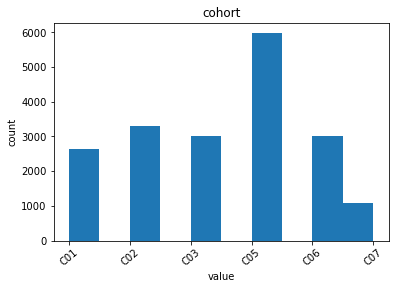

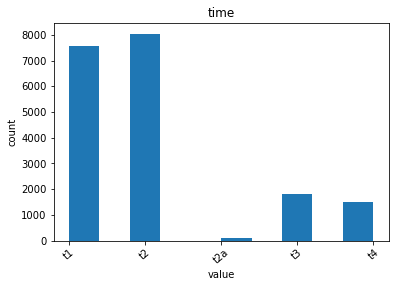

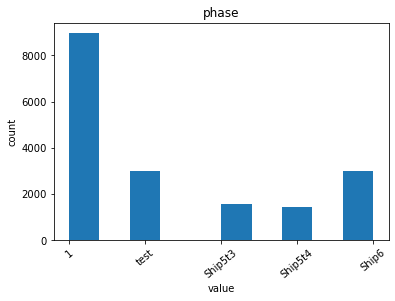

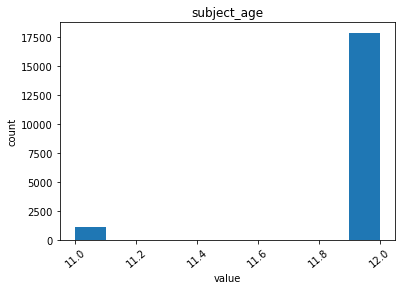

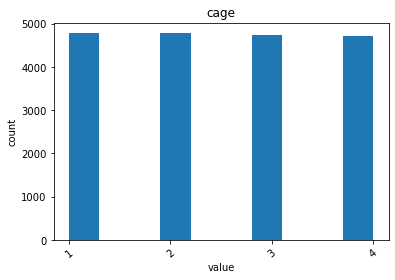

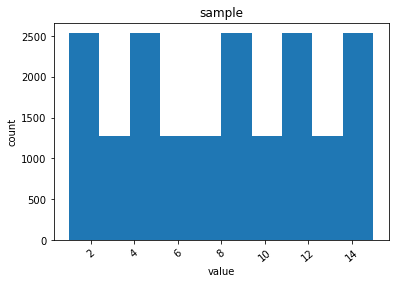

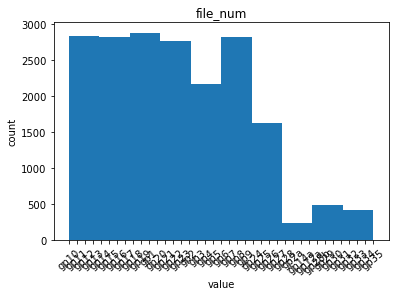

In [45]:
graph_columns = ['cohort','time','phase','subject_age','cage','sample','file_num']
for col in graph_columns:
    plt.title(col)
    plt.xlabel('value')
    plt.ylabel('count')
    plt.xticks(rotation = 40)
    plt.hist(df_csv[col].dropna())
    plt.show() 